In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [36]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
final_weight_train = train["Final Weight"]
x_train = train.drop(columns = ['Income', 'Final Weight'])
y_train = train['Income']

final_weight_test = test["Final Weight"]
x_test = test.drop(columns =['Income', 'Final Weight'])
y_test = test['Income']
stds = StandardScaler()
stds.fit(x_train)
x_train = stds.transform(x_train)
x_test = stds.transform(x_test)

<h1>Instance-Based --K-nearest neighbors</h1>


<p>Making an instance of the classifier</p>

In [37]:
default_knn = KNeighborsClassifier()
default_knn.fit(x_train, y_train)

KNeighborsClassifier()

# Default Parameters on the test set

Making a prediction on the test set.

In [38]:
y_pred_default = default_knn.predict(x_test)

Creating a confusion matrix for the test set.

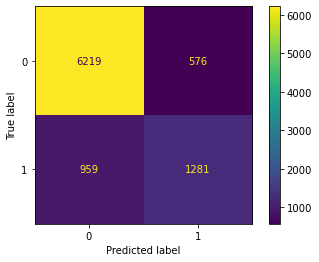

In [39]:
plot_confusion_matrix(default_knn, x_test, y_test)

plt.show()

In [40]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6795
           1       0.69      0.57      0.63      2240

    accuracy                           0.83      9035
   macro avg       0.78      0.74      0.76      9035
weighted avg       0.82      0.83      0.82      9035



Tuning the hyper parameters to see if there is over-fitting of the model.

# Hyper Parameter Tuning

In [7]:
f1 = make_scorer(f1_score, pos_label = 1, average = 'binary')

# create the parameter grid
param_grid = [{
    'weights': ["uniform", "distance"],
    'n_neighbors': list(range(10, 20, 5)),
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'leaf_size' : list(range(25,50, 5))
}]

n_folds = 5

# Instantiate the grid search model
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn_clf, param_grid = param_grid,
                          cv = n_folds, verbose = 2, scoring = f1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)




Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': [25, 30, 35, 40, 45],
                          'metric': ['euclidean', 'manhattan', 'cosine'],
                          'n_neighbors': [10, 15],
                          'weights': ['uniform', 'distance']}],
             scoring=make_scorer(f1_score, pos_label=1, average=binary),
             verbose=2)

The result of cross validation using GridSearchCV.

In [8]:
# cv results

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017876,0.000100,24.254188,4.058501,25,euclidean,10,uniform,"{'leaf_size': 25, 'metric': 'euclidean', 'n_ne...",0.651075,0.649449,0.642261,0.662052,0.663934,0.653754,0.008128,31
1,0.021171,0.003200,14.238613,2.263406,25,euclidean,10,distance,"{'leaf_size': 25, 'metric': 'euclidean', 'n_ne...",0.653012,0.650941,0.642551,0.661022,0.661590,0.653823,0.007045,26
2,0.020924,0.007329,11.588081,0.860280,25,euclidean,15,uniform,"{'leaf_size': 25, 'metric': 'euclidean', 'n_ne...",0.664427,0.662215,0.648765,0.665049,0.679794,0.664050,0.009859,11
3,0.016507,0.003018,11.380004,1.275831,25,euclidean,15,distance,"{'leaf_size': 25, 'metric': 'euclidean', 'n_ne...",0.643446,0.652121,0.642174,0.654080,0.665237,0.651412,0.008337,36
4,0.020561,0.006740,15.556689,0.351412,25,manhattan,10,uniform,"{'leaf_size': 25, 'metric': 'manhattan', 'n_ne...",0.666038,0.661834,0.657307,0.667933,0.670662,0.664755,0.004704,6
5,0.015508,0.002385,14.793835,1.420703,25,manhattan,10,distance,"{'leaf_size': 25, 'metric': 'manhattan', 'n_ne...",0.655787,0.661493,0.653049,0.664432,0.673986,0.661749,0.007325,21
6,0.014333,0.002276,13.386820,0.223487,25,manhattan,15,uniform,"{'leaf_size': 25, 'metric': 'manhattan', 'n_ne...",0.673761,0.674090,0.674962,0.677681,0.686131,0.677325,0.004614,1
7,0.013922,0.001339,13.954266,2.039951,25,manhattan,15,distance,"{'leaf_size': 25, 'metric': 'manhattan', 'n_ne...",0.654878,0.662077,0.656854,0.667879,0.675452,0.663428,0.007517,16
8,0.022180,0.013514,14.892868,3.154646,25,cosine,10,uniform,"{'leaf_size': 25, 'metric': 'cosine', 'n_neigh...",0.609787,0.603345,0.590895,0.605453,0.615143,0.604924,0.008095,56
9,0.026442,0.002601,11.646471,0.959653,25,cosine,10,distance,"{'leaf_size': 25, 'metric': 'cosine', 'n_neigh...",0.601640,0.601942,0.608929,0.617542,0.622563,0.610523,0.008358,51


In [9]:
# printing the optimal accuracy score and hyperparameters

print("Best F-1 Score: ", grid_search.best_score_)
print("It was achieved using the following hyper-parameters: ")
print(grid_search.best_params_)

Best F-1 Score:  0.6773250270928044
It was achieved using the following hyper-parameters: 
{'leaf_size': 25, 'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


# Creating a model using the best hyper-parameters:

Training the model:

In [41]:
# model with optimal hyperparameters
tuned_model = KNeighborsClassifier(metric = 'manhattan',
                                  n_neighbors = 15,
                                  weights = 'uniform')

tuned_model.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

Creating a confusion matrix and classification report.

In [42]:
y_pred_test = tuned_model.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6795
           1       0.72      0.56      0.63      2240

    accuracy                           0.84      9035
   macro avg       0.79      0.75      0.76      9035
weighted avg       0.83      0.84      0.83      9035



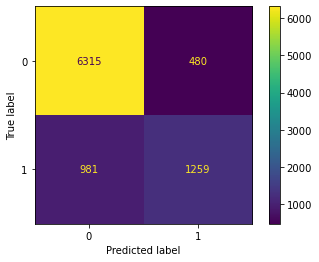

In [43]:
plot_confusion_matrix(tuned_model, x_test, y_test)

plt.show()

Creating a function that returns a classification report on the minority class with taking the weight of each row into account in order to produce a more accurate classification report. 

In [44]:
#precision = true_positive / (true_positive + false_positive)
#Recall = true_positive / (true_positive + false_negative)
#f1= (2 * precision * recall) / (precision + recall)

def calculate_weighted_classification(final_weight, y_pred_income, y_actual):
    df = pd.DataFrame(final_weight)
    df["Predicted_Income"] = y_pred_income
    df["Actual_Income"] = y_actual
    true_positive = 0
    false_negatives = 0
    false_positive = 0
    for i in range(len(df)):
        actual_income = df.loc[i, "Actual_Income"]
        predicted_income = df.loc[i, "Predicted_Income"]
        final_weight = df.loc[i, "Final Weight"]
        if actual_income == 1 and predicted_income == 1:
            true_positive += final_weight
        elif actual_income == 1 and predicted_income == 0:
            false_negatives += final_weight
        elif actual_income == 0 and predicted_income == 1:
            false_positive += final_weight
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negatives)
    f1= (2 * precision * recall) / (precision + recall)
    return precision, recall, f1

In [45]:
precision, recall, f1 = calculate_weighted_classification(final_weight_test, y_pred_test, y_test)
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")

Weighted Precision: 0.7385557662845931
Weighted Recall: 0.5648324722708864
Weighted F1 Score: 0.6401166851755185


Exporting the model.

In [46]:
import joblib
joblib.dump(tuned_model, 'knn.pkl', compress=9)

['knn.pkl']